# Pandas

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Library documentation: <a>http://pandas.pydata.org/</a>

### General

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create a series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# create a data frame
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.691155,0.874231,-2.267215,-0.384129
2013-01-02,-0.101289,-0.721774,1.026327,0.966737
2013-01-03,-1.127306,0.162092,1.250390,0.942373
2013-01-04,-0.072159,-0.211143,2.246938,-0.161190
2013-01-05,-0.322284,-0.118736,-0.526366,-0.721187
2013-01-06,-2.460577,-2.035222,-0.534664,-0.836199


In [4]:
# another way to create a data frame
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
      'D' : np.array([3] * 4,dtype='int32'),
      'E' : 'foo' })
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [5]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [6]:
df.head()

,A,B,C,D
2013-01-01,0.691155,0.874231,-2.267215,-0.384129
2013-01-02,-0.101289,-0.721774,1.026327,0.966737
2013-01-03,-1.127306,0.162092,1.250390,0.942373
2013-01-04,-0.072159,-0.211143,2.246938,-0.161190
2013-01-05,-0.322284,-0.118736,-0.526366,-0.721187


In [7]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
df.values

array([[ 0.69115505,  0.8742309 , -2.26721522, -0.38412923],
       [-0.10128915, -0.72177422,  1.02632732,  0.96673697],
       [-1.127306  ,  0.16209203,  1.2503902 ,  0.94237311],
       [-0.07215947, -0.21114257,  2.24693789, -0.16118962],
       [-0.32228415, -0.11873627, -0.52636623, -0.72118722],
       [-2.46057651, -2.03522241, -0.5346639 , -0.83619924]])

In [10]:
# quick data summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.565410,-0.341759,0.199235,-0.032266
std,1.095824,0.980972,1.620529,0.801159
min,-2.460577,-2.035222,-2.267215,-0.836199
25%,-0.926051,-0.594116,-0.532589,-0.636923
50%,-0.211787,-0.164939,0.249981,-0.272659
75%,-0.079442,0.091885,1.194374,0.666482
max,0.691155,0.874231,2.246938,0.966737


In [11]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.691155,-0.101289,-1.127306,-0.072159,-0.322284,-2.460577
B,0.874231,-0.721774,0.162092,-0.211143,-0.118736,-2.035222
C,-2.267215,1.026327,1.250390,2.246938,-0.526366,-0.534664
D,-0.384129,0.966737,0.942373,-0.161190,-0.721187,-0.836199


In [12]:
# axis 0 is index, axis 1 is columns
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.384129,-2.267215,0.874231,0.691155
2013-01-02,0.966737,1.026327,-0.721774,-0.101289
2013-01-03,0.942373,1.250390,0.162092,-1.127306
2013-01-04,-0.161190,2.246938,-0.211143,-0.072159
2013-01-05,-0.721187,-0.526366,-0.118736,-0.322284
2013-01-06,-0.836199,-0.534664,-2.035222,-2.460577


In [13]:
# can sort by values too
df.sort_values(by='B', ascending=True)

,A,B,C,D
2013-01-06,-2.460577,-2.035222,-0.534664,-0.836199
2013-01-02,-0.101289,-0.721774,1.026327,0.966737
2013-01-04,-0.072159,-0.211143,2.246938,-0.161190
2013-01-05,-0.322284,-0.118736,-0.526366,-0.721187
2013-01-03,-1.127306,0.162092,1.250390,0.942373
2013-01-01,0.691155,0.874231,-2.267215,-0.384129


### Selection

In [14]:
# select a column (yields a series)
df['A']

2013-01-01    0.691155
2013-01-02   -0.101289
2013-01-03   -1.127306
2013-01-04   -0.072159
2013-01-05   -0.322284
2013-01-06   -2.460577
Freq: D, Name: A, dtype: float64

In [15]:
# column names also attached to the object
df.A

2013-01-01    0.691155
2013-01-02   -0.101289
2013-01-03   -1.127306
2013-01-04   -0.072159
2013-01-05   -0.322284
2013-01-06   -2.460577
Freq: D, Name: A, dtype: float64

In [16]:
# slicing works
df[0:3]

,A,B,C,D
2013-01-01,0.691155,0.874231,-2.267215,-0.384129
2013-01-02,-0.101289,-0.721774,1.026327,0.966737
2013-01-03,-1.127306,0.162092,1.250390,0.942373


In [17]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.101289,-0.721774,1.026327,0.966737
2013-01-03,-1.127306,0.162092,1.250390,0.942373
2013-01-04,-0.072159,-0.211143,2.246938,-0.161190


In [18]:
# cross-section using a label
df.loc[dates[0]]

A    0.691155
B    0.874231
C   -2.267215
D   -0.384129
Name: 2013-01-01 00:00:00, dtype: float64

In [19]:
# getting a scalar value
df.loc[dates[0], 'A']

0.6911550461503523

In [20]:
# select via position
df.iloc[3]

A   -0.072159
B   -0.211143
C    2.246938
D   -0.161190
Name: 2013-01-04 00:00:00, dtype: float64

In [21]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.072159,-0.211143
2013-01-05,-0.322284,-0.118736


In [22]:
# column slicing
df.iloc[:,1:3]

,B,C
2013-01-01,0.874231,-2.267215
2013-01-02,-0.721774,1.026327
2013-01-03,0.162092,1.250390
2013-01-04,-0.211143,2.246938
2013-01-05,-0.118736,-0.526366
2013-01-06,-2.035222,-0.534664


In [23]:
# get a value by index
df.iloc[1,1]

-0.7217742177843184

In [24]:
# boolean indexing
df[df.A > 0]

,A,B,C,D
2013-01-01,0.691155,0.874231,-2.267215,-0.384129


In [25]:
df[df > 0]

,A,B,C,D
2013-01-01,0.691155,0.874231,NaN,NaN
2013-01-02,NaN,NaN,1.026327,0.966737
2013-01-03,NaN,0.162092,1.250390,0.942373
2013-01-04,NaN,NaN,2.246938,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,NaN


In [26]:
# filtering
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3[df3['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.127306,0.162092,1.250390,0.942373,two
2013-01-05,-0.322284,-0.118736,-0.526366,-0.721187,four


In [27]:
# setting examples
df.at[dates[0],'A'] = 0
df.iat[0,1] = 0
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.000000,0.000000,-2.267215,5
2013-01-02,-0.101289,-0.721774,1.026327,5
2013-01-03,-1.127306,0.162092,1.250390,5
2013-01-04,-0.072159,-0.211143,2.246938,5
2013-01-05,-0.322284,-0.118736,-0.526366,5
2013-01-06,-2.460577,-2.035222,-0.534664,5


In [28]:
# dealing with missing data
df4 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df4.loc[dates[0]:dates[1],'E'] = 1
df4

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-2.267215,5,1.0
2013-01-02,-0.101289,-0.721774,1.026327,5,1.0
2013-01-03,-1.127306,0.162092,1.250390,5,NaN
2013-01-04,-0.072159,-0.211143,2.246938,5,NaN


In [29]:
# drop rows with missing data
df4.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-2.267215,5,1.0
2013-01-02,-0.101289,-0.721774,1.026327,5,1.0


In [30]:
# fill missing data
df4.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.000000,0.000000,-2.267215,5,1.0
2013-01-02,-0.101289,-0.721774,1.026327,5,1.0
2013-01-03,-1.127306,0.162092,1.250390,5,5.0
2013-01-04,-0.072159,-0.211143,2.246938,5,5.0


In [31]:
# boolean mask for nan values
pd.isnull(df4)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


### Operations

In [32]:
df.mean()

A   -0.680603
B   -0.487464
C    0.199235
D    5.000000
dtype: float64

In [33]:
# pivot the mean calculation
df.mean(1)

2013-01-01    0.683196
2013-01-02    1.300816
2013-01-03    1.321294
2013-01-04    1.740909
2013-01-05    1.008153
2013-01-06   -0.007616
Freq: D, dtype: float64

In [34]:
# aligning objects with different dimensions
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
df.sub(s,axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-2.127306,-0.837908,0.250390,4.0
2013-01-04,-3.072159,-3.211143,-0.753062,2.0
2013-01-05,-5.322284,-5.118736,-5.526366,0.0
2013-01-06,NaN,NaN,NaN,NaN


In [35]:
# applying functions
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.000000,0.000000,-2.267215,5
2013-01-02,-0.101289,-0.721774,-1.240888,10
2013-01-03,-1.228595,-0.559682,0.009502,15
2013-01-04,-1.300755,-0.770825,2.256440,20
2013-01-05,-1.623039,-0.889561,1.730074,25
2013-01-06,-4.083615,-2.924783,1.195410,30


In [36]:
df.apply(lambda x: x.max() - x.min())

A    2.460577
B    2.197314
C    4.514153
D    0.000000
dtype: float64

In [37]:
# simple count aggregation
s = pd.Series(np.random.randint(0,7,size=10))
s.value_counts()

1    3
0    3
2    2
3    1
6    1
dtype: int64

### Merging / Grouping / Shaping

In [38]:
# concatenation
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.693999,1.846429,-0.967683,-1.333421
1,0.379379,1.369883,-0.888907,-0.186648
2,0.056346,1.586703,-0.003081,0.865195
3,0.181505,-0.315013,-1.113245,-0.292274
4,-1.920323,1.544994,-1.149545,3.109455
5,-0.472737,0.033262,-0.658062,1.768303
6,-1.013733,1.355941,0.662091,1.192308
7,1.698823,0.525754,-0.169426,0.517448
8,-0.888374,1.270436,1.009077,-0.060448
9,0.478400,-0.054036,-0.934065,-0.345207


In [39]:
# SQL-style join
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [40]:
# append
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

/var/folders/by/m4c7_99d74j70dpnkg3np2r80000gq/T/ipykernel_20161/1589254775.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(s, ignore_index=True)


,A,B,C,D
0,-1.059690,-0.283616,0.441501,0.681783
1,-0.704608,-0.747502,-1.052491,0.746071
2,-0.874944,0.432373,-0.263924,-0.432652
3,-1.527266,0.549098,0.210287,0.145817
4,-0.200697,1.059730,1.844343,0.527698
5,0.189591,-0.374329,0.354756,-0.183955
6,-0.847276,-0.859356,-0.053905,-0.276783
7,0.407395,1.049366,0.245129,0.916311
8,-1.527266,0.549098,0.210287,0.145817


In [41]:
df = pd.DataFrame(
    { 'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
      'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
      'C' : np.random.randn(8),
      'D' : np.random.randn(8) })
df

,A,B,C,D
0,foo,one,1.389944,1.734555
1,bar,one,1.187961,-0.299520
2,foo,two,0.960833,-0.877847
3,bar,three,-1.247923,1.966005
4,foo,two,-0.357252,-0.686586
5,bar,two,0.531210,-0.721811
6,foo,one,-0.239836,0.691615
7,foo,three,0.835225,-1.020086


In [42]:
# group by
df.groupby('A').sum()

,C,D
A,,
bar,0.471247,0.944674
foo,2.588914,-0.158349


In [43]:
# group by multiple columns
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.187961 -0.299520
    three -1.247923  1.966005
    two    0.531210 -0.721811
foo one    1.150108  2.426171
    three  0.835225 -1.020086
    two    0.603581 -1.564433

In [44]:
df = pd.DataFrame(
    { 'A' : ['one', 'one', 'two', 'three'] * 3,
      'B' : ['A', 'B', 'C'] * 4,
      'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
      'D' : np.random.randn(12),
      'E' : np.random.randn(12)} )
df

,A,B,C,D,E
0,one,A,foo,1.259683,0.537710
1,one,B,foo,0.112066,-0.315327
2,two,C,foo,-1.708302,0.209526
3,three,A,bar,-0.194662,-1.187678
4,one,B,bar,-0.815290,-0.951493
5,one,C,bar,0.984409,1.577187
6,two,A,foo,-0.650129,0.151128
7,three,B,foo,-1.818497,-2.023126
8,one,C,foo,-2.352835,1.275586
9,one,A,bar,-0.833754,-0.149504


In [45]:
# pivot table
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.833754  1.259683
      B -0.815290  0.112066
      C  0.984409 -2.352835
three A -0.194662       NaN
      B       NaN -1.818497
      C -0.441357       NaN
two   A       NaN -0.650129
      B  0.242238       NaN
      C       NaN -1.708302

### Time Series

In [46]:
# time period resampling
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5min').sum()

2012-01-01    26793
Freq: 5T, dtype: int64

In [47]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.241794
2012-02-29   -0.454835
2012-03-31   -1.034527
2012-04-30   -0.664150
2012-05-31   -0.773773
Freq: M, dtype: float64

In [48]:
ps = ts.to_period()
ps.to_timestamp()

2012-01-01    1.241794
2012-02-01   -0.454835
2012-03-01   -1.034527
2012-04-01   -0.664150
2012-05-01   -0.773773
Freq: MS, dtype: float64

### Plotting

<AxesSubplot:>

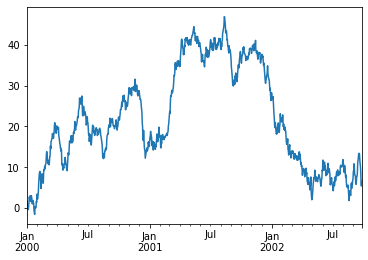

In [49]:
# time series plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

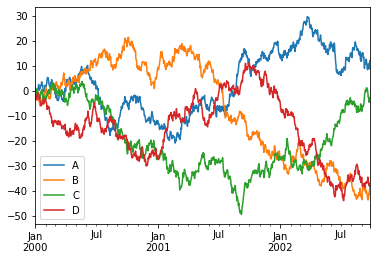

In [50]:
# plot with a data frame
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Input / Output

In [51]:
# write to a csv file
df.to_csv('foo.csv', index=False)

In [52]:
# read file back in
path = 'foo.csv'
newDf = pd.read_csv(path)
newDf.head()

,A,B,C,D
0,0.516798,0.606663,0.906253,-1.771108
1,0.283486,-0.408081,1.045068,-2.352274
2,0.196105,-0.875084,0.656507,-3.011147
3,-0.453618,-1.113390,-0.140828,-3.340388
4,-0.291920,-1.858002,-1.168524,-3.629610


In [53]:
# remove the file
import os
os.remove(path)

In [54]:
# if the cell below fails, you need to install openpyxl and xlrd
# which can be donw uncommenting the 3 lines below and running this cell

#import sys
#!{sys.executable} -m pip install openpyxl
#!{sys.executable} -m pip install xlrd

In [55]:
# can also do Excel (this requires to install the packages openpyxl and xlrd)
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [56]:
newDf2 = pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'], engine='openpyxl')
newDf2.head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.516798,0.606663,0.906253,-1.771108
1,2000-01-02,0.283486,-0.408081,1.045068,-2.352274
2,2000-01-03,0.196105,-0.875084,0.656507,-3.011147
3,2000-01-04,-0.453618,-1.113390,-0.140828,-3.340388
4,2000-01-05,-0.291920,-1.858002,-1.168524,-3.629610


In [57]:
os.remove('foo.xlsx')